In [2]:
from pyiso import client_factory

In [5]:
# Now you can connect to ISO's (Independent System Operators)
# You will access it through the balancing authorities
# Certain usage will require tokens, available by going to watttime.org
#creds_df = pd.read_json('creds.json')
#token = creds_df.token[0]
bpa = client_factory('BPA') # Bonneville Power Administration (Pac NW)

In [6]:
# Get generation data:
bpa_gen = bpa.get_generation(yesterday=True)
type(bpa_gen)

list

In [7]:
# Print the response data (limited)
bpa_gen[0:3]

[{'ba_name': 'BPA',
  'freq': '5m',
  'fuel_name': 'wind',
  'gen_MW': 1049.0,
  'market': 'RT5M',
  'timestamp': Timestamp('2018-05-07 07:00:00+0000', tz='UTC')},
 {'ba_name': 'BPA',
  'freq': '5m',
  'fuel_name': 'hydro',
  'gen_MW': 11892.0,
  'market': 'RT5M',
  'timestamp': Timestamp('2018-05-07 07:00:00+0000', tz='UTC')},
 {'ba_name': 'BPA',
  'freq': '5m',
  'fuel_name': 'biomass',
  'gen_MW': 162.0,
  'market': 'RT5M',
  'timestamp': Timestamp('2018-05-07 07:00:00+0000', tz='UTC')}]

In [8]:
# You want to parse yout fuel and energy as lists
fuel,energy = map(list,zip(*[(i['fuel_name'], i['gen_MW']) for i in bpa_gen]))

In [9]:
fuel[0:5]

['wind', 'hydro', 'biomass', 'wind', 'hydro']

In [10]:
energy[0:5]

[1049.0, 11892.0, 162.0, 884.0, 12189.0]

In [11]:
# You realize that's a complete pain in the ___
import pandas as pd

bpa_gen_df = pd.DataFrame(bpa_gen)
bpa_gen_df.head()

,ba_name,freq,fuel_name,gen_MW,market,timestamp
0,BPA,5m,wind,1049.0,RT5M,2018-05-07 07:00:00+00:00
1,BPA,5m,hydro,11892.0,RT5M,2018-05-07 07:00:00+00:00
2,BPA,5m,biomass,162.0,RT5M,2018-05-07 07:00:00+00:00
3,BPA,5m,wind,884.0,RT5M,2018-05-07 07:05:00+00:00
4,BPA,5m,hydro,12189.0,RT5M,2018-05-07 07:05:00+00:00


In [12]:
bpa_gen_df['fuel_name'].unique()

array(['wind', 'hydro', 'biomass'], dtype=object)

In [13]:
# You want to plot inline (specific to Jupyter Notebooks)
%matplotlib inline

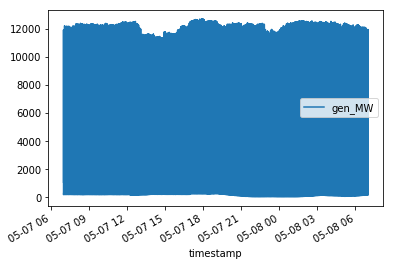

In [14]:
# You plot it out
bpa_gen_df.plot.line(x='timestamp',y='gen_MW')

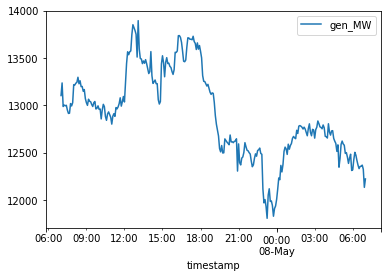

In [15]:
bpa_gen_df.groupby('timestamp', as_index = False).sum().plot.line('timestamp','gen_MW')

In [16]:
# You want some more options in your plots
import plotnine as pn

/Users/stoltzmanconsulting/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


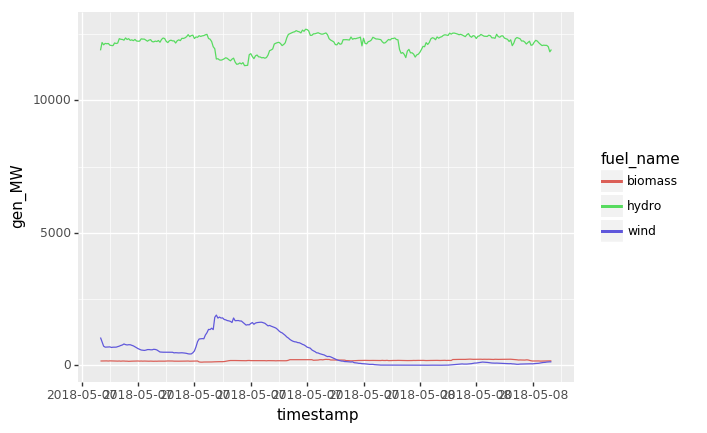

<ggplot: (-9223372036561993703)>

In [17]:
(pn.ggplot(bpa_gen_df, pn.aes('timestamp','gen_MW', color='fuel_name'))) + pn.geom_line()

In [44]:
bpa_gen_df.groupby('fuel_name').sum()

,gen_MW
fuel_name,
biomass,52454.0
hydro,3524350.0
wind,150406.0


In [53]:
bpa1 = bpa_gen_df.groupby('fuel_name').sum().reset_index()
bpa1['PCT'] = 100*bpa1['gen_MW'] / bpa1['gen_MW'].sum()
bpa1.head()

,fuel_name,gen_MW,PCT
0,biomass,52454.0,1.407326
1,hydro,3524350.0,94.557323
2,wind,150406.0,4.035351


In [18]:
# So that's pretty sweet - but what if you want more than just BPA?
# You know Colorado is PSCO
psco = client_factory('PSCO')

ValueError: No client found for name PSCO

In [19]:
## Huh?? said it's PSCO in the documentation???
# Documents say you can access PSCO from within EIA
client = client_factory('EIA')

In [20]:
psco = client.get_generation('PSCO')

Balancing authority not set.


ValueError: Balancing authority not set.

In [24]:
# Balancing authority... didn't we just set it by asking for PSCO??
# In Python, modules (like classes) need parameters to be set
# Check out:    http://pyiso.readthedocs.io/en/latest/pyiso.html
client.set_ba('PSCO')
psco_gen = client.get_generation(yesterday=True)
psco_gen_df = pd.DataFrame(psco_gen)
psco_gen_df.head()

In [26]:
# Load info
psco_load= client.get_load(yesterday=True)
psco_load_df = pd.DataFrame(psco_load)
psco_load_df.head()

,ba_name,freq,load_MW,market,timestamp
0,PSCO,1hr,4963,RTHR,2018-05-08 18:00:00+00:00
1,PSCO,1hr,4892,RTHR,2018-05-08 17:00:00+00:00
2,PSCO,1hr,4806,RTHR,2018-05-08 16:00:00+00:00
3,PSCO,1hr,4688,RTHR,2018-05-08 15:00:00+00:00
4,PSCO,1hr,4619,RTHR,2018-05-08 14:00:00+00:00


In [27]:
# Trade info
psco_trade = client.get_trade(yesterday=True)
psco_trade_df = pd.DataFrame(psco_trade)
psco_trade_df.head()

,ba_name,freq,market,net_exp_MW,timestamp
0,PSCO,1hr,RTHR,-359,2018-05-07 23:00:00+00:00
1,PSCO,1hr,RTHR,-348,2018-05-07 22:00:00+00:00
2,PSCO,1hr,RTHR,-309,2018-05-07 21:00:00+00:00
3,PSCO,1hr,RTHR,-434,2018-05-07 20:00:00+00:00
4,PSCO,1hr,RTHR,-441,2018-05-07 19:00:00+00:00


In [28]:
# Get all into one dataframe
gen_sum = psco_gen_df.groupby(['timestamp'], as_index=False).sum()
load_sum = psco_load_df.groupby(['timestamp'], as_index=False).sum()
trade_sum = psco_trade_df.groupby(['timestamp'], as_index=False).sum()
glt = gen_sum.merge(load_sum, on=['timestamp']).merge(trade_sum, on=['timestamp'])
glt.head()

,timestamp,gen_MW,load_MW,net_exp_MW
0,2018-05-07 00:00:00+00:00,4726,5010,-284
1,2018-05-07 01:00:00+00:00,4736,5052,-316
2,2018-05-07 02:00:00+00:00,4768,5048,-280
3,2018-05-07 03:00:00+00:00,4861,5133,-272
4,2018-05-07 04:00:00+00:00,4767,4933,-166


In [40]:
glt_rs = pd.melt(glt, id_vars=['timestamp'],value_vars=['gen_MW','load_MW','net_exp_MW'])
glt_rs.head()

,timestamp,variable,value
0,2018-05-07 00:00:00,gen_MW,4726
1,2018-05-07 01:00:00,gen_MW,4736
2,2018-05-07 02:00:00,gen_MW,4768
3,2018-05-07 03:00:00,gen_MW,4861
4,2018-05-07 04:00:00,gen_MW,4767


In [42]:
glt_rs.groupby('variable').sum()

,value
variable,
gen_MW,102422
load_MW,110266
net_exp_MW,-7844


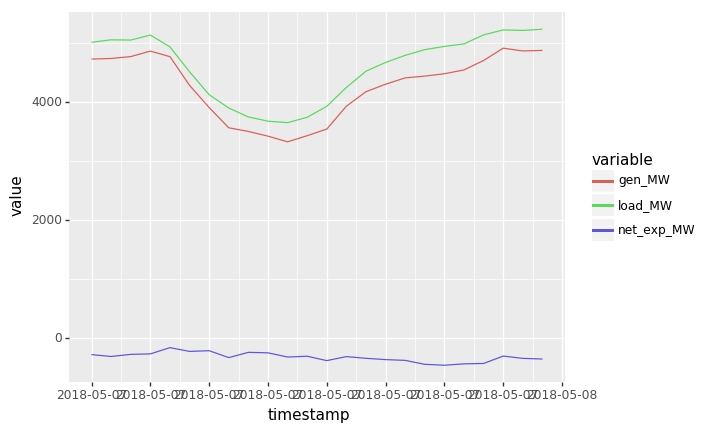

<ggplot: (293280218)>

In [43]:
(pn.ggplot(glt_rs, pn.aes('timestamp','value', color='variable'))) + pn.geom_line()

In [54]:
psco1 = psco_gen_df.groupby('fuel_name').sum().reset_index()
psco1['PCT'] = 100*psco1['gen_MW'] / psco1['gen_MW'].sum()
psco1.head()

,fuel_name,gen_MW,PCT
0,other,102422,100.0


In [76]:
df = pd.DataFrame(client.get_load(forecast=True))
df.head()

,ba_name,freq,load_MW,market,timestamp
0,PSCO,1hr,5904,RTHR,2018-05-08 22:00:00+00:00
1,PSCO,1hr,5242,RTHR,2018-05-08 21:00:00+00:00
2,PSCO,1hr,5173,RTHR,2018-05-08 20:00:00+00:00
3,PSCO,1hr,5035,RTHR,2018-05-08 19:00:00+00:00
4,PSCO,1hr,4966,RTHR,2018-05-08 18:00:00+00:00


In [77]:
df1 = df.groupby('timestamp').sum()
df1.head()

,load_MW
timestamp,
2015-07-01 07:00:00+00:00,4875
2015-07-01 08:00:00+00:00,4618
2015-07-01 09:00:00+00:00,4427
2015-07-01 10:00:00+00:00,4344
2015-07-01 11:00:00+00:00,4374


In [78]:
tmp = df1.diff()
tmp.head()

,load_MW
timestamp,
2015-07-01 07:00:00+00:00,NaN
2015-07-01 08:00:00+00:00,-257.0
2015-07-01 09:00:00+00:00,-191.0
2015-07-01 10:00:00+00:00,-83.0
2015-07-01 11:00:00+00:00,30.0


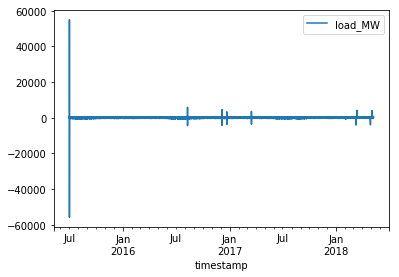

In [79]:
tmp.plot()

In [ ]:
# https://pyiso.readthedocs.io/en/latest/intro.html
# https://www.eia.gov/realtime_grid/docs/userguideandknownissues.pdf (timezones)
eia_values = ['AEC', 'AECI', 'AESO', 'AVA', 'AZPS', 'BANC', 'BCTC',
               'BPAT', 'CISO', 'CFE', 'CHPD', 'CISO', 'CPLE', 'CPLW',
               'DEAA', 'DOPD', 'DUK', 'EEI', 'EPE', 'ERCO', 'FMPP',
               'FPC', 'FPL', 'GCPD', 'GRID', 'GRIF', 'GRMA', 'GVL',
               'GWA', 'HGMA', 'HQT', 'HST', 'IESO', 'IID', 'IPCO',
               'ISNE', 'JEA', 'LDWP', 'LGEE', 'MHEB', 'MISO', 'NBSO',
               'NEVP', 'NSB', 'NWMT', 'NYIS', 'OVEC', 'PACE', 'PACW',
               'PGE', 'PJM', 'PNM', 'PSCO', 'PSEI', 'SC', 'SCEG',
               'SCL', 'SEC', 'SEPA', 'SOCO', 'SPA', 'SPC', 'SRP',
               'SWPP', 'TAL', 'TEC', 'TEPC', 'TIDC', 'TPWR', 'TVA',
               'WACM', 'WALC', 'WAUW', 'WWA', 'YAD']